In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading in the data
df = pd.read_csv('../input/household-power-consumption/household_power_consumption.txt', sep=';', \
                 low_memory=False, infer_datetime_format=True, parse_dates={'Timestamp': [0, 1]} )
df.head()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.shape

(2075259, 8)

In [4]:
df.set_index('Timestamp', inplace=True) # sets the index
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
household_df = df.copy() # copies df to 'household_df' variable to be our working dataframe

In [6]:
household_df.isnull().sum() # checks for Nan values

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
household_df.dtypes # checking the data types

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

#### Let's convert the data types of the dataset to float to speed up computation. Running ````df.astype(np.float32)```` threw ***ValueError: could not convert string to float: '?'***. This means that somehow, our dataset contains '***?***' and we need to handle them. First, let's see where they appear. It is obvious they aren't in ````Sub_metering_3```` because its data type is float.

In [8]:
(household_df == '?').sum() # checking the number of question marks present

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [9]:
cols = list(household_df.columns) # storing the columns in a variable

In [10]:
# having a view of the part of the dataframe with a question mark
bad_df = household_df[household_df['Global_active_power'] == '?'] 
bad_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


#### It seems where ````Sub_metering_3```` has Nan values, the ````Global_active_power```` column has '***?***'. Let's confirm if this is always true.

In [11]:
bad_df['Sub_metering_3'].isnull().sum() == household_df.isnull().sum()['Sub_metering_3']

True

#### Let's also confirm that where ````Global_active_power```` has a '***?***', other columns apart from ````Sub_metering_3```` also have a '***?***'

In [12]:
is_question_mark = (bad_df[cols[:-1]] == '?')
print(is_question_mark.sum().sum() == (len(cols)-1) * household_df.isnull().sum()['Sub_metering_3'])
is_question_mark.sum()

True


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
dtype: int64

#### Haven confirmed that, we can now confidently convert all '***?***' to Nan values

In [13]:
household_df.replace('?', np.nan, inplace=True)

In [14]:
bool_is_nan = household_df.isnull()
bool_is_nan.sum() # checks for Nan values

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [15]:
print('we have {}% missing values'.format(round(bool_is_nan['Global_active_power'].sum()*100 \
                                          / household_df.shape[0], 3)))

we have 1.252% missing values


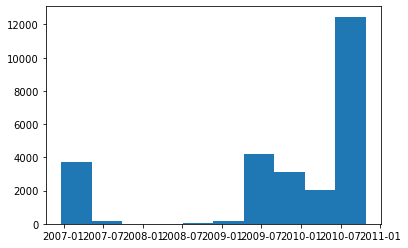

In [16]:
# checking the distribution of the Nan values
hist = plt.hist(household_df[bool_is_nan.sum(axis=1) == household_df.shape[1]].index)

#### We can now safely convert our data type to float

In [17]:
household_df = household_df.astype(np.float32) 
household_df.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [18]:
print('the dataset spans for {}'.format(household_df.index[-1] - household_df.index[0]))

the dataset spans for 1441 days 03:38:00


In [19]:
# making a list of all columns
cols = list(household_df.columns)

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(3, 9))

In [20]:
# creating a function to nicely plot all the columns in the dataframe
def plot_series_of_each_column(d_f, cols=cols[1:], title=None):
    fig = plt.figure(figsize=(18, 12))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        if i < 7:
            plt.xlabel('')
        else:
            plt.xlabel('year')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 1)
    plt.xlabel('year')
    plt.ylabel('Global_active_power')
    plt.plot(d_f.index, d_f['Global_active_power'], '-')
    
    if title:
        plt.title(title)
        
    plt.grid()

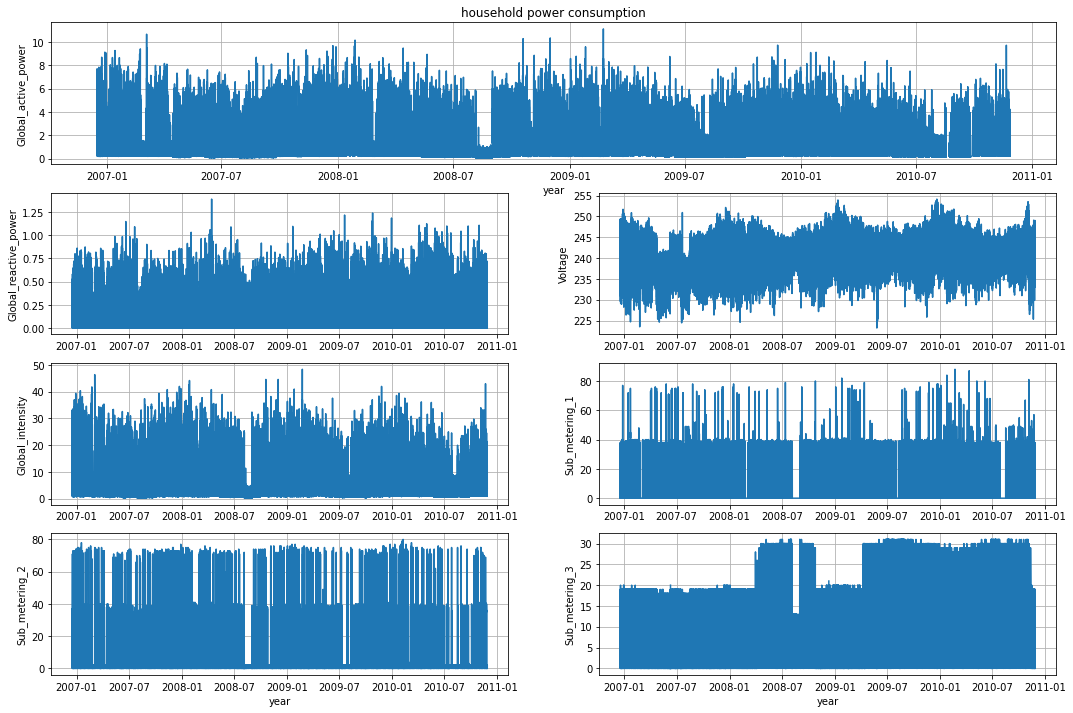

In [21]:
plot_series_of_each_column(household_df, title='household power consumption')

## Resampling

# We were asked to resample to a daily time frame and fill Nan values with the mean of each column

In [22]:
# resampling
daily_household_df = household_df.resample('D').sum()
print('household_df has been downsampled from {} observations to {}'.format(household_df.shape[0], \
                                                                            daily_household_df.shape[0]))

household_df has been downsampled from 2075259 observations to 1442


In [23]:
# mean dict to use for resampling
mean_dict = {col: daily_household_df[col].mean() for col in daily_household_df.columns} 
daily_household_df.fillna(mean_dict, inplace=True) # imputing Nan values

In [24]:
daily_household_df.isnull().sum() # checking for Nan values in the daily time frame

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

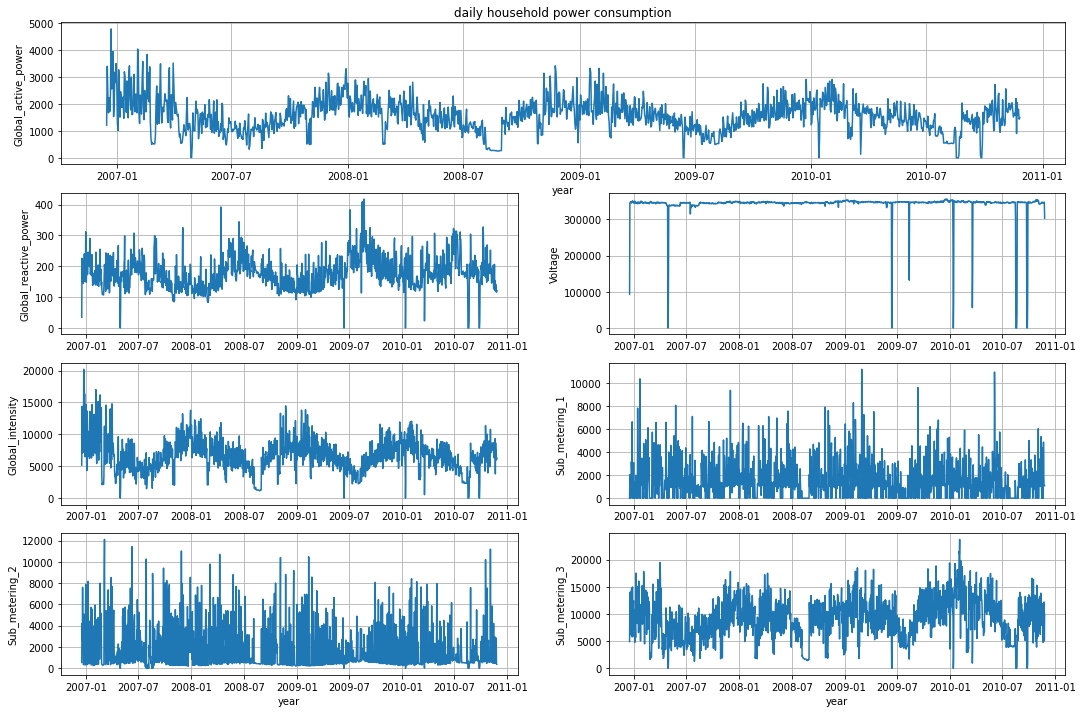

In [25]:
plot_series_of_each_column(daily_household_df, title='daily household power consumption')

## correlation question

In [26]:
daily_household_df['Global_active_power'].corr(daily_household_df['Global_reactive_power'])

0.12850750684590315

## The answer was NOT in the options

In [27]:
daily_household_df['Voltage'].corr(daily_household_df['Global_intensity'])

0.2744029161009341

## The answer was NOT in the options

In [28]:
# creating a time series split function
def ts_train_test_split(df, split_point):
    train, test = df[df.index < split_point], df[df.index >= split_point]
    return train, test

In [29]:
split_point = daily_household_df.index[-365] # splitting point

In [30]:
train1, test1 = ts_train_test_split(daily_household_df, split_point) # splitting the data

In [31]:
from fbprophet import Prophet # imports Prophet

In [32]:
# creating a function to create the required dataframe for facebook prophet
def make_fbprophet_dataframe(time_series):
    df = pd.DataFrame({'ds': time_series.index, 'y': time_series.values})
    
    return df

In [33]:
active_power_series = make_fbprophet_dataframe(train1['Global_active_power'])

In [34]:
# fitting and predicting univariate time series
m1 = Prophet()
m1.fit(active_power_series)
future1 = m1.make_future_dataframe(periods=365)
forecast1 = m1.predict(future1)[-365:]

In [35]:
forecast1.shape

(365, 19)

In [36]:
yhat1 = forecast1['yhat'].values # obtaining predictions

In [37]:
from sklearn.metrics import mean_squared_error as mse

In [38]:
# creating mape function
def mape(y_true, y_pred):
    y_true1 = y_true[y_true != 0]
    y_pred = y_pred[y_true != 0]
    error = y_true1 - y_pred
    
    return (100/y_true1.shape[0]) * np.sum(np.abs(error/y_true1))

In [39]:
mape(test1['Global_active_power'], yhat1) # obtaining mape 

32.82525354558313

## The answer was NOT in the options

In [40]:
mse(test1['Global_active_power'].values, forecast1['yhat'].values, squared=False) # rmse

440.74469133883184

## The answer was NOT in the options

In [41]:
# checking month with minimal seasonality  for approach1
forecast1[forecast1['yearly'] == forecast1['yearly'].min()] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1337,2010-08-14,1576.356146,385.025754,1540.68262,1571.390276,1581.572053,-616.851605,-616.851605,-616.851605,233.450622,233.450622,233.450622,-850.302227,-850.302227,-850.302227,0.0,0.0,0.0,959.50454


In [42]:
# creating a dictionary for renaming the columns for a multivariate time series
add = {'Global_reactive_power': 'add1', 'Voltage': 'add2', 'Global_intensity': 'add3', 'Sub_metering_1': 'add4',\
 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'}

In [43]:
daily_household_df2 = daily_household_df.rename(columns=add)

In [44]:
daily_household_df2.head()

,Global_active_power,add1,add2,add3,add4,add5,add6
Timestamp,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [45]:
train2, test2 = ts_train_test_split(daily_household_df2, split_point) # splitting the data into train and test

In [46]:
# adding the 'add' columns to 'active_power_series' to use for multivariate time series
for col in list(add.values()):
    active_power_series[col] = train2[col].values

In [47]:
active_power_series.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [48]:
# adding 'add' columns as regressors and fitting them
m2 = Prophet()
for reg in add.values():
    m2.add_regressor(reg)
m2.fit(active_power_series)

In [49]:
# creating the test dataframe 
test2 = test2.reset_index().rename(columns={'Timestamp': 'ds'}).drop('Global_active_power', axis=1)

In [50]:
forecast2 = m2.predict(test2) # forecasts the test data

In [51]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1587.588455,1365.242356,1396.967577,1587.588455,1587.588455,7.084046,7.084046,7.084046,-0.041236,...,0.016816,0.016816,0.016816,3.416530,3.416530,3.416530,0.0,0.0,0.0,1381.287368
1,2009-11-28,1587.707377,1845.569450,1879.802568,1587.707377,1587.707377,-8.705477,-8.705477,-8.705477,-0.037339,...,0.801318,0.801318,0.801318,3.721541,3.721541,3.721541,0.0,0.0,0.0,1861.768372
2,2009-11-29,1587.826300,1627.353732,1659.887889,1587.826300,1587.826300,-2.852974,-2.852974,-2.852974,-0.062768,...,0.159816,0.159816,0.159816,4.061333,4.061333,4.061333,0.0,0.0,0.0,1643.951480
3,2009-11-30,1587.945223,1724.125766,1758.142508,1587.945223,1587.945223,3.601189,3.601189,3.601189,-0.069534,...,-0.206837,-0.206837,-0.206837,4.442374,4.442374,4.442374,0.0,0.0,0.0,1742.042608
4,2009-12-01,1588.064146,1746.081725,1779.599435,1588.064146,1588.064146,5.572697,5.572697,5.572697,-0.052735,...,-1.537391,-1.537391,-1.537391,4.870384,4.870384,4.870384,0.0,0.0,0.0,1762.202367


In [52]:
yhat2 = forecast2['yhat'] # pulling out the forecasts

In [53]:
mape(test1['Global_active_power'].values, yhat2.values) # evaluating mape of the predictions

3.0082359032295782

## The answer was NOT in the options

In [54]:
mse(test1['Global_active_power'].values, yhat2.values, squared=False) # evaluating rmse of the predictions

39.06983879154409

## The answer was NOT in the options

In [55]:
forecast2[forecast2['weekly'] == forecast2['weekly'].min()] # finding the day with minimal seasonality

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
207,2010-06-22,1612.2055,1442.965118,1706.615903,1473.285752,1733.623203,-6.001424,-6.001424,-6.001424,-0.023802,...,-1.537391,-1.537391,-1.537391,-7.755132,-7.755132,-7.755132,0.0,0.0,0.0,1585.303536


# None of my answers were in the options